# Binomial Distribution

Here let's try to understand the statistics of a random walk on the line.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['lines.linewidth'] = 2
plt.rcParams.update({'font.size': 16})

Starting from $x=0$, a drunk person takes $N$ independent steps to the right with probabiblity $p$ and left with probabiblity $q$. We want to analyse the distribution of (1) the total number of 'right', denoted as $m$; (2) the total displacement $x=m-(N-m) = 2m-N$.

In [72]:
def step(p):
    # 0 <= p < 1. Left step occurs if rand <= p, right step if rand > p
    
    if np.random.random_sample() <= p:
        ans = 1
    else:
        ans = -1

    return ans

array([ 1.,  0., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.])

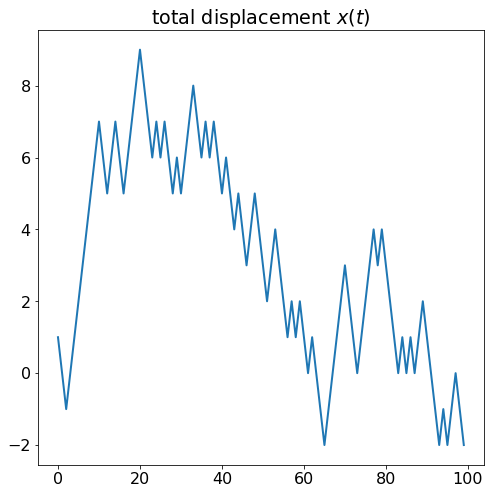

In [73]:
N = 100 
p = 1/2
steps = np.zeros(N)

for i in range(N):
    steps[i] = step(p)
    
dist = np.cumsum(steps)
plt.plot(dist)
plt.title(r'total displacement $x(t)$')
dist[0:10]


In [74]:
# Better to make a vectorized version - we can get all the steps at once, because they're independent! 
# But we'll leave that for another day
# 
# To estimate PDF, run many experiments.

Nexp = 1000
N = 500
p = 1/3
steps = np.zeros(N)
dist = np.zeros((N,Nexp))
for j in range(Nexp):
    for i in range(N):
        steps[i] = step(p)
    
    dist[:,j] = np.cumsum(steps)


In class, we proved that the mean of the total displacement is $N(p-q) $. In the next cell, we would like to check if the theoretical mean is correct:

[]

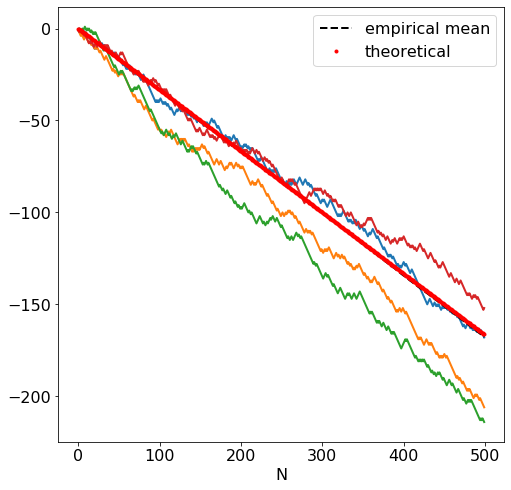

In [77]:
# Plot a distance for a few experiments
plt.plot(dist[:,0])
plt.plot(dist[:,1])
plt.plot(dist[:,2])
plt.plot(dist[:,3])

# plot the mean as a black dashed line
plt.plot(np.mean(dist,axis=1),'k--',label='empirical mean')
plt.plot(range(N),np.asarray(range(N))*(p-(1-p)),'r.',label='theoretical')
plt.legend()
plt.xlabel('N')
plt.plot()

We could also check variance, which is equal to $4Npq$ theoretically. The trajectories should fall in the range of mean $\pm$ standard deviation in intuition.

[]

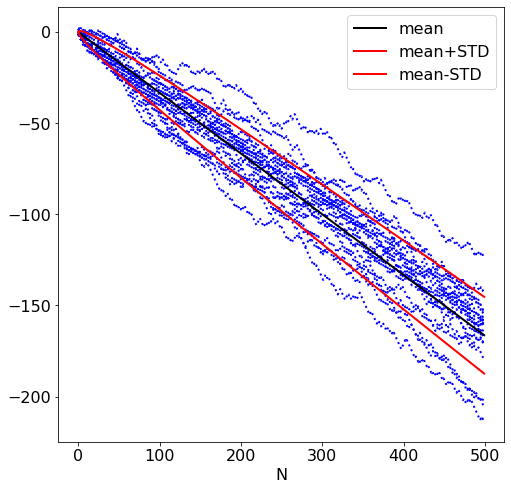

In [78]:
# Plot a distance for a few experiments
for j in range(20):
    plt.plot(dist[:,j],'b:')


# plot the mean as a black dashed line
#plt.plot(np.mean(dist,axis=1),'k--',label='empirical mean')
plt.plot(range(N),np.asarray(range(N))*(p-(1-p)),'k',label='mean')
plt.plot(range(N), np.asarray(range(N))*(p-(1-p))+np.sqrt( np.asarray(range(N))*4*p*(1-p)),'r',label='mean+STD' ) 
plt.plot(range(N), np.asarray(range(N))*(p-(1-p))-np.sqrt( np.asarray(range(N))*4*p*(1-p)),'r',label='mean-STD' ) 

plt.legend()
plt.xlabel('N')
plt.plot()

When $p<<1$ and $m<<N$, the distribution is like poisson process with $\mu=Np$, i.e. 
$$
P_N(m) = \frac{N!}{m!(N-m)!}p^m(1-p)^{N-m} \approx \frac{\mu^m}{m!}e^{-\mu},\quad \mu = Np.
$$

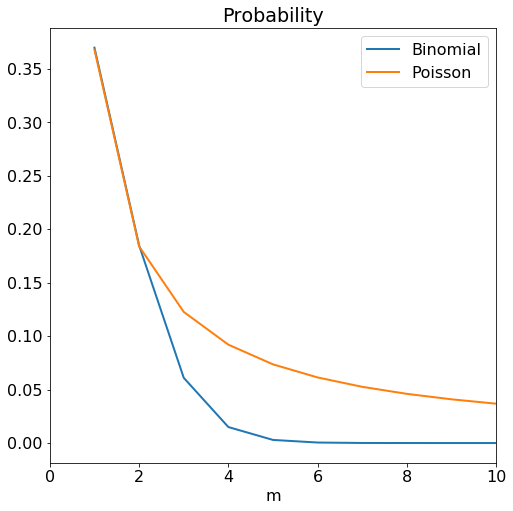

In [92]:
N = 100;
p = 0.01;
def PN(N,p,m):
    return comb(N,m)*(p**m)*( (1-p)**(N-m))
def Poisson(N,p,m):
    mu = N*p
    return (mu**m)/comb(m,1)*np.exp(-mu)
m = range(1,N)
pn = np.zeros(N-1)
pp = np.zeros(N-1)
for i in range(1,N):
    pn[i-1] = PN(N,p,i)
    pp[i-1] = Poisson(N,p,i)
    
    
plt.plot(m,pn,label='Binomial')
plt.plot(m,pp,label='Poisson')
plt.xlabel('m')
plt.title('Probability')
plt.xlim([0,10])
plt.legend()
plt.show()

Then we can check if it is almost Gaussian, when $N$, $m$ are large and $p \approx q$:

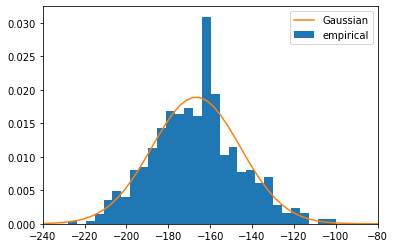

In [70]:
p = 1/3
N = 500
arr = plt.hist(dist[-1,:],30,density=True,label='empirical')  # normalized
def G(N,p,m):
    sigma = np.sqrt(4*N*p*(1-p))
    mu = N*(p - (1-p))
    return 1/np.sqrt(2*np.pi)/sigma*np.exp(-(m-mu)**2/2/(sigma**2))
mgrid = np.linspace(-240,-80)
Ggrid = np.zeros(np.shape(mgrid)[0])
for i in range(np.shape(mgrid)[0]):
    Ggrid[i] = G(N,p,mgrid[i])
plt.plot(mgrid,Ggrid,label='Gaussian')
plt.xlim([-240,-80])
plt.legend()